In [1]:
import xarray as xr
import rasterio
import numpy as np 

import matplotlib.pyplot as plt
from matplotlib.cm import YlOrBr
import matplotlib.colors as colors

import sys
sys.path.append("../AWS_Scripts/")

import functions_model_analysis as f
import functions_training_pipeline as f_tp

# PLOTS

Basis:
- #FFFFCC (yellow)
- #FFEDA0 (light yellow)
- #FED976 (light orange)
- #FC8D59 (orange)
- #E34A33 (reddish orange)
- #B30000 (brownish red)
- #662506 (dark brown)
- #808080 (gray)
- #D3D3D3 (lightgray)

More:
- #FEE6CE (pale orange)
- #FDAE6B (bright orange)
- #FDBB84 (warm orange)
- #FC8D62 (coral)
- #EF6548 (reddish coral)
- #D7301F (dark coral)
- #8B0000 (dark red-brown)

light yellow / white: #ffffe5

orange: #fead3a

brown/red: #9c3605      or      firebrick

gray: #808080

lightgray: #D3D3D3

In [32]:
cmap = YlOrBr
cmap.set_bad('gray',1.)
cbar_kwargs={'label': "Snow Optical Grain Diameter (mm)"}
figsize=(6.4*1, 4.8*1)

## METHODS: Raster Alignment Section - Example Microwave vs. Optical

In [2]:
opt_path = r"../Data/optical-rs/2017-08-03_grain_diameter.tif"
mw_path_tif = r"../Data/microwave-rs/mw-tif/2017-08-03_mw.tif"

data_mw_tif = xr.open_dataarray(mw_path_tif)
data_opt = xr.open_dataarray(opt_path)

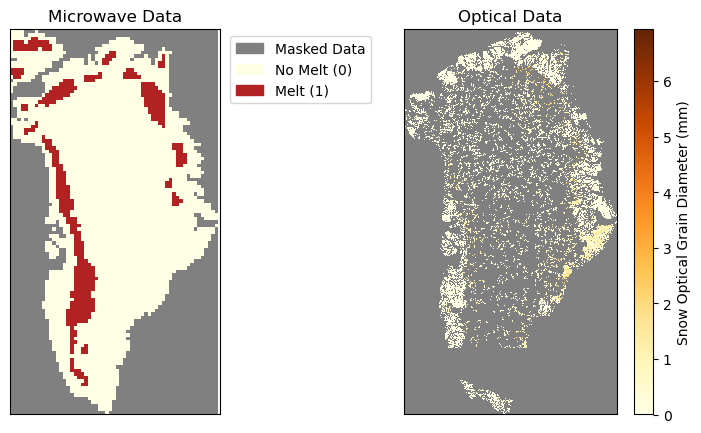

In [45]:
# Create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True,  figsize=(9.5,5))



# Plot the categorical data
colors_list = ["#808080", "#ffffe5", "firebrick"]  # Blue, Green, Red
# Create the colormap
my_cmap = colors.ListedColormap(colors_list)
cat_im = data_mw_tif.plot(ax=axs[0], cmap=my_cmap, add_colorbar=False)
axs[0].set_title('Microwave Data')

# Add legend to categorical data plot
legend_labels = ['Masked Data', 'No Melt (0)', 'Melt (1)']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors_list[i]) for i in range(3)]
axs[0].legend(legend_handles, legend_labels, bbox_to_anchor=(1.75,1))



# Plot the continuous data
cont_im = data_opt.plot(ax=axs[1], cmap=cmap, cbar_kwargs=cbar_kwargs)
axs[1].set_title('Optical Data')


for idx, ax in enumerate(axs):
    ax.set_aspect("equal")
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)


plt.show()

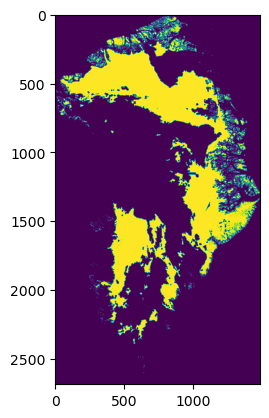

In [2]:
src = rasterio.open("../Data/optical-rs/2019-06-08_grain_diameter.tif")

plt.imshow(src.read(1))

In [4]:
import xarray

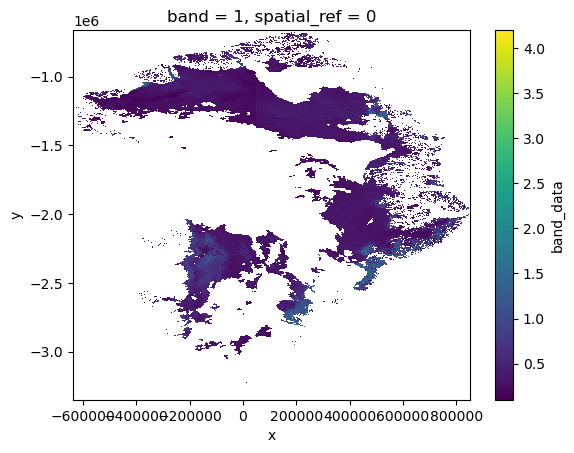

In [6]:
opt = xarray.open_dataarray("../Data/optical-rs/2019-06-08_grain_diameter.tif")
opt.plot()

# TESTING

In [3]:
lr = f.load_object("LinearRegression")
rr = f.load_object("RidgeRegression")
lasso = f.load_object("LassoRegression")

f.model_comparison_table([lr, rr, lasso])

RMSE  RMSE_std        R2    R2_std
Model            Set                                          
LinearRegression Train  0.033137  0.001464  0.128257  0.007396
                 Test   0.036065  0.008292  0.027555  0.130037
RidgeRegression  Train  0.033093  0.001248  0.129729  0.009309
                 Test   0.036859  0.010145  0.019577  0.233433
LassoRegression  Train  0.033047  0.001262  0.130916  0.014872
                 Test   0.033252  0.003979  0.108544  0.100981

In [8]:
rr.final_model

Ridge(alpha=50)

In [4]:
lasso.final_model

Lasso(alpha=0.01)

In [7]:
lasso.final_model.coef_

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.10933447,
        0.        ,  0.03623529,  0.02868215,  0.        , -0.        ,
       -0.        , -0.        , -0.        ])

In [76]:
rr.hyperparameters

[{'alpha': 15}, {'alpha': 20}, {'alpha': 30}, {'alpha': 40}, {'alpha': 50}]

In [77]:
rr = f.load_object("RidgeRegression")
rr.final_model.n_iter_

In [71]:
rr = f.load_object("LassoRegression")
rr.final_model.n_iter_

1

In [68]:
en = f.load_object("ElasticNetRegression")
en.final_model.n_iter_

1

In [15]:
data_path = r"D:/MasterThesis/Data/combined/dataframe_extended/"

In [41]:
date = "2019-08-08"

import pandas as pd
data = pd.read_parquet(data_path + "melt_" + date + "_extended.parquet.gzip")
# replace missing values of target with nan
data["opt_value"] = data["opt_value"].replace(-1, np.nan)
data = f_tp.data_normalization(data)
data

Not applicable for feature'mw_value'.
Not applicable for feature'col'.
Not applicable for feature'row'.
Not applicable for feature'date'.
Not applicable for feature'mw_value_yesterday'.


,x,y,mw_value,opt_value,col,row,mean_3,mean_9,sum_5,date,mw_value_yesterday,mw_value_7_day_average,hours_of_daylight,elevation_data,slope_data,aspect_data,distance_to_margin
0,0.000000,1.0,0.0,NaN,0,0,0.0,0.0,0.0,2019-08-08,0.0,0.0,1.000000,0.003790,0.000000,1.000000,0.298597
1,0.000684,1.0,0.0,NaN,1,0,0.0,0.0,0.0,2019-08-08,0.0,0.0,1.000000,0.003790,0.000000,1.000000,0.298597
2,0.001369,1.0,0.0,NaN,2,0,0.0,0.0,0.0,2019-08-08,0.0,0.0,1.000000,0.003790,0.000000,1.000000,0.298597
3,0.002053,1.0,0.0,NaN,3,0,0.0,0.0,0.0,2019-08-08,0.0,0.0,1.000000,0.003790,0.000000,1.000000,0.298597
4,0.002738,1.0,0.0,NaN,4,0,0.0,0.0,0.0,2019-08-08,0.0,0.0,1.000000,0.003790,0.000000,1.000000,0.298597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278720,0.475702,0.0,0.0,NaN,695,2662,0.0,0.0,0.0,2019-08-08,0.0,0.0,0.679030,0.011911,0.071960,0.508809,0.008016
2278721,0.476386,0.0,0.0,NaN,696,2662,0.0,0.0,0.0,2019-08-08,0.0,0.0,0.679029,0.011911,0.007003,1.000000,0.006012
2278722,0.477070,0.0,0.0,NaN,697,2662,0.0,0.0,0.0,2019-08-08,0.0,0.0,0.679028,0.011911,0.000450,0.853553,0.004008
2278723,0.477755,0.0,0.0,NaN,698,2662,0.0,0.0,0.0,2019-08-08,0.0,0.0,0.679026,0.012182,0.000318,0.500000,0.002004


In [42]:
data["opt_value"].describe()

count    878475.000000
mean          0.351766
std           0.233003
min           0.000000
25%           0.192095
50%           0.330522
75%           0.494474
max           1.611857
Name: opt_value, dtype: float64

In [45]:
res = f_ma.mean_predict(lr, data)

,row,col,mean_prediction,std_prediction,error_prediction
0,0,0,0.310047,0.011920,NaN
1,0,1,0.310113,0.011918,NaN
2,0,2,0.310179,0.011915,NaN
3,0,3,0.310244,0.011913,NaN
4,0,4,0.310310,0.011911,NaN
...,...,...,...,...,...
2278720,2662,695,0.294265,0.026283,NaN
2278721,2662,696,0.387205,0.015773,NaN
2278722,2662,697,0.396199,0.015556,NaN
2278723,2662,698,0.395424,0.017031,NaN
